In [1]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# First we download some data
iris_data = load_iris(return_X_y=True, as_frame=True)
iris = iris_data[0]
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris.columns = features
iris['type'] = iris_data[1]
del iris_data

# For this example, we take just 2 classes to perform some binary classification
# We have 3 classes [0, 1 and 2], so just choose 2 of them to classify from.
# We are discarding class 0 (therefore classifying 1 vs 2), but feel free to change it to:
# CLASS_DISCARDED = 1 (we'd classify between 0 and 2)
# CLASS_DISCARDED = 2 (we'd classify between 0 and 1)
CLASS_DISCARDED = 0
iris_binary = iris[iris['type'] != CLASS_DISCARDED]

print('We will work with',len(iris_binary),'records')

PERCENTAGE_SAMPLES_USED_FOR_TESTING = 0.5

train, test = train_test_split(iris_binary, test_size=PERCENTAGE_SAMPLES_USED_FOR_TESTING)
print('Using', len(train),'samples for training the model and',len(test),'samples for testing it later.')

We will work with 100 records
Using 50 samples for training the model and 50 samples for testing it later.


# KNN

### We start by reviewing the KNN classifier :)

In [3]:
classifier = KNeighborsClassifier(
    metric='minkowski', # The similarity metric to be using: there are many other distance metrics we could use. See the documentation
    p=2, # This means we're going to use the Euclidean Distance. If it was p=1 we'd be using the basic Taxicab (Minkowski) distance
    weights='uniform', # This refers to the aggregate function - how the top K most similar samples will be aggregated
    n_neighbors=5 # And the most important! How many closest neighbors we are using to predict each test sample!
)

In [4]:
# Same fit function as we used in Logistic Regression, do you start to see a pattern here?
classifier.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['type'])

KNeighborsClassifier()

In [5]:
# And the same predict function too!
preds = classifier.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [6]:
print('The classifier\'s predictions over the testing data are:\n',list(preds))

The classifier's predictions over the testing data are:
 [np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(1)]


In [7]:
print('And the real testing data we were expecting is:\n',list(test['type']))

And the real testing data we were expecting is:
 [2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2]


In [8]:
# It is behaving pretty good already:
right = 0
for real, pred in zip(test['type'], preds):  # With ZIP we join two arrays together, element by element, like a zip
    if real == pred:
        right += 1
print('Correctly guessed:', right, '/',len(preds),'(', round(100*right/len(preds), 2), '%)')

Correctly guessed: 44 / 50 ( 88.0 %)


In [9]:
# Let's find the best K for our model (basic optimisation process)

def get_accuracy(predictions, real):
    right = 0
    for real, pred in zip(real, predictions):
        if real == pred:
            right += 1
    return round(100*right/len(preds), 2)

accuracies = []
for k in range(1, len(train)):
    knn_model = KNeighborsClassifier( # We use the default params - which are the same as we used above.
    metric='minkowski',
    p=2,
    weights='uniform',
    n_neighbors=k
    )
    knn_model.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['type'])
    preds = knn_model.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    accuracy = get_accuracy(test['type'], preds)
    accuracies.append(accuracy)
    print('K =',k, '\t-  Accuracy:', accuracy, '%')

K = 1 	-  Accuracy: 86.0 %
K = 2 	-  Accuracy: 84.0 %
K = 3 	-  Accuracy: 88.0 %
K = 4 	-  Accuracy: 88.0 %
K = 5 	-  Accuracy: 88.0 %
K = 6 	-  Accuracy: 84.0 %
K = 7 	-  Accuracy: 88.0 %
K = 8 	-  Accuracy: 84.0 %
K = 9 	-  Accuracy: 88.0 %
K = 10 	-  Accuracy: 88.0 %
K = 11 	-  Accuracy: 86.0 %
K = 12 	-  Accuracy: 84.0 %
K = 13 	-  Accuracy: 86.0 %
K = 14 	-  Accuracy: 86.0 %
K = 15 	-  Accuracy: 88.0 %
K = 16 	-  Accuracy: 84.0 %
K = 17 	-  Accuracy: 84.0 %
K = 18 	-  Accuracy: 82.0 %
K = 19 	-  Accuracy: 84.0 %
K = 20 	-  Accuracy: 84.0 %
K = 21 	-  Accuracy: 84.0 %
K = 22 	-  Accuracy: 82.0 %
K = 23 	-  Accuracy: 82.0 %
K = 24 	-  Accuracy: 82.0 %
K = 25 	-  Accuracy: 82.0 %
K = 26 	-  Accuracy: 82.0 %
K = 27 	-  Accuracy: 82.0 %
K = 28 	-  Accuracy: 80.0 %
K = 29 	-  Accuracy: 80.0 %
K = 30 	-  Accuracy: 80.0 %
K = 31 	-  Accuracy: 80.0 %
K = 32 	-  Accuracy: 80.0 %
K = 33 	-  Accuracy: 80.0 %
K = 34 	-  Accuracy: 80.0 %
K = 35 	-  Accuracy: 80.0 %
K = 36 	-  Accuracy: 72.0 %
K

Larger K values make the model slower and usually do not yield good accuracies.
This is because the more samples we aggregate in the final stage, the more similar to the average of the
entire data every result will be.



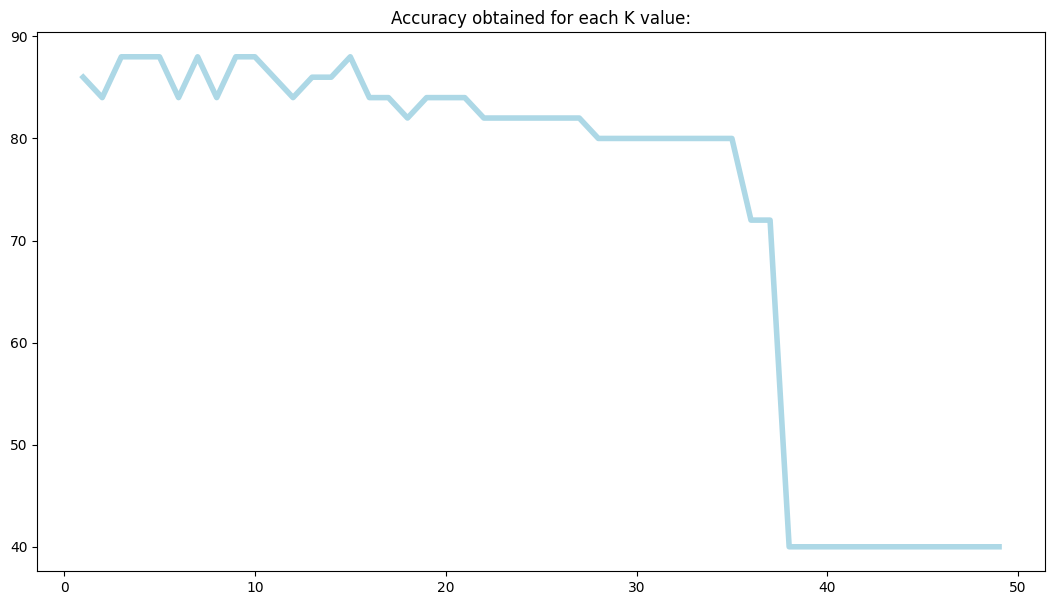

In [10]:
plt.figure(figsize=(13, 7))
plt.title('Accuracy obtained for each K value:')
plt.plot(range(1, len(train)), accuracies, color='lightblue', linewidth=4)
print('Larger K values make the model slower and usually do not yield good accuracies.')
print('This is because the more samples we aggregate in the final stage, the more similar to the average of the')
print('entire data every result will be.\n')

Now the accuracy does not decrease that much, because far away neighbors do not count much,
even if they are selected in the "K" group


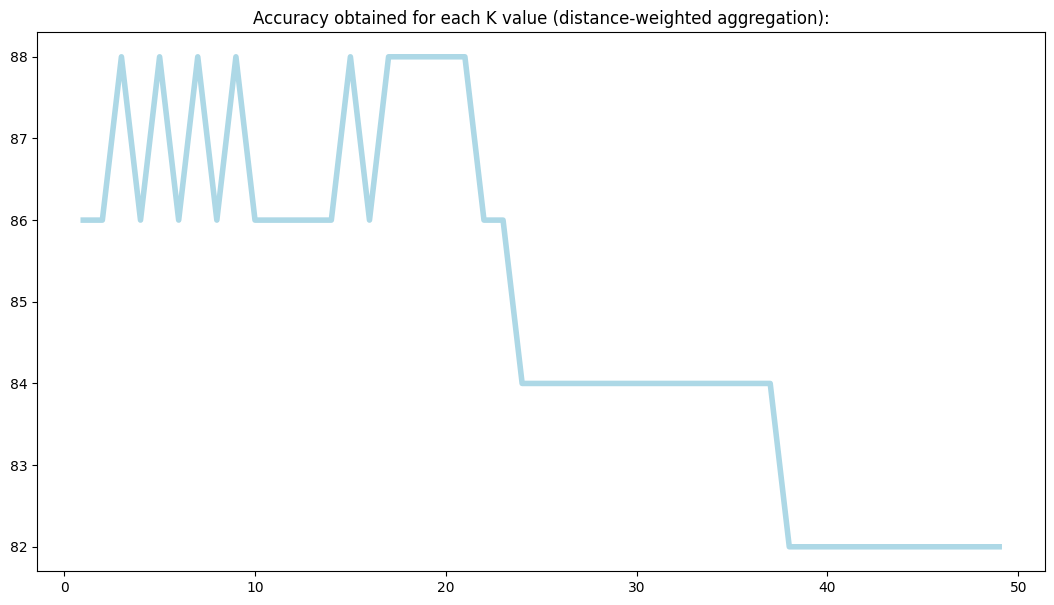

In [11]:
# Now let's change the aggregation function!
# From uniform to distance. That is, from "all of the K selected neighbors count the same" to
# "nearest neighbors are weighted by their distance, the closer ones count more to the aggregated result"
accuracies = []
for k in range(1, len(train)):
    knn_model = KNeighborsClassifier( # We use the default params - which are the same as we used above.
        metric='minkowski',
        p=2,
        weights='distance', 
        n_neighbors=k
    )
    knn_model.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['type'])
    preds = knn_model.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    accuracy = get_accuracy(test['type'], preds)
    accuracies.append(accuracy)

plt.figure(figsize=(13, 7))
plt.title('Accuracy obtained for each K value (distance-weighted aggregation):')
plt.plot(range(1, len(train)), accuracies, color='lightblue', linewidth=4)
print('Now the accuracy does not decrease that much, because far away neighbors do not count much,\neven if they are selected in the "K" group')

## Try some other distance functions

#### Optional of course... if you want :)

In this link you can find other distance functions you can use to select the K nearest neighbors: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

Which one retrieves the best accuracy consistently? 

You can do some double optimisation, searching for the best value of K for each distance, and then retrieve the best combination of K value and distance. 

Basically this is an "exercise" where you can practice your intuition and analytical skills to produce good models - not just the default model using the default parameters from sklearn.

In [12]:
distances = ["euclidean", "manhattan", "chebyshev", "minkowski", "wminkowski" , "seuclidean", "mahalanobis"]

In [13]:
# Fit and use to predict your own KNN classifier here!

# Naive Bayes

### And now let's have a look at Naive Bayes

We will use the same train/test split as in the 2nd code cell above

In [14]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB, BernoulliNB, CategoricalNB

In [15]:
# It is basically the same idea that we have seen in other classifiers...
gaussianNB = GaussianNB()

gaussianNB.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['type'])
predictions = gaussianNB.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

accuracy = get_accuracy(test['type'], predictions)
print('Gaussian Naive Bayes -  Accuracy:', accuracy, '%')

Gaussian Naive Bayes -  Accuracy: 94.0 %


In [16]:
# So let's just do the others all together... 

# First we put the imported classifiers in a list:
nb_classifiers = [MultinomialNB, ComplementNB, GaussianNB, BernoulliNB, CategoricalNB]

# Then we iterate over them: (1)create model, (2)fit, (3)predict and (4)compare predictions against real values
for classifier in nb_classifiers:
    model = classifier()
    model.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['type'])
    predictions = model.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    accuracy = get_accuracy(test['type'], predictions)
    print(str(model), '-  Accuracy:', accuracy, '%')

MultinomialNB() -  Accuracy: 40.0 %
ComplementNB() -  Accuracy: 92.0 %
GaussianNB() -  Accuracy: 94.0 %
BernoulliNB() -  Accuracy: 40.0 %
CategoricalNB() -  Accuracy: 88.0 %


It is normal that Multinomial doesn't work well - it is suited for discrete input features, and we have continuous variables, which leave very small samples to accurately approximate p(y|X) (since X consists of continuos values and we only have 100 training samples... what are the chances that more than one sample have the same 4 continuous values? (4 because we have 4 input features).

So that makes Multinomial a random classifier (its accuracy should be around 50%)

And the exact same case is for the Bernoulli classifier: it is designed for discrete data...

Gaussian and Complement are the ones designed for continuous features, as we have in our case, so...
The Categorical one should also perform slightly worse than them, although Scikit Learn does something under the hood to transform the continuous variables into categorical, placing them into buckets (like if it was a histogram).

### Note on predict_proba and predict_log_proba

Like Logistic Regression, the NB classifiers provide the `predict_proba` and `predict_log_proba`. 

Therefore many data scientists do not consider those probabilities as reliable estimations of how sure NB is of a sample belonging to a class, and just use `predict` to get the majority class instead, without a percentage or anything... 